# Overall Journey Analysis 
## Step 1: Dataset overview
### - Overall and columnwise details of data
## Step 2: Handling Missing Values
### - 'Age' Feature: Median imputation Vs Random sample imputation
### - 'Annual Income' Feature: Multilinear Regression model
### - 'Gender' Feature: Unsupervised clustering Vs Random sample imputation
### - 'Spending Score' Feature: Specified Random Sample Imputation based on clustering
## Step 3: Outlier Analysis
### - Identify outliers
### - Correcting outliers in 'Annual Income' 
## Step 4: Clustering using BIRCH algorithm
### - Clustering between Age and Spending Score
### - Clustering between Annual Income and Spending Score
### - Clustering between CustomerID and Spending Score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import missingno as msno
from matplotlib import rcParams
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39.0
1,2,Male,NaN,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,40.0


In [3]:
def overview(df):
    print("Dataset Overview:\n")
    print(f"Number of variables: {df.shape[1]}")
    print(f"Number of observations: {df.shape[0]}")
    print(f"Missing cells: {df.isnull().sum().sum()}")
    print(f"Missing cells (%): {(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100}")
    print(f"Duplicate rows: {df.duplicated().sum()}\n")
    print("Variable Types:\n")
    print(f"Numeric: {df.select_dtypes(include=np.number).shape[1]}")
    print(f"Categorical: {df.select_dtypes(exclude=np.number).shape[1]}")

In [4]:
overview(df)

Dataset Overview:

Number of variables: 5
Number of observations: 200
Missing cells: 54
Missing cells (%): 5.4
Duplicate rows: 0

Variable Types:

Numeric: 4
Categorical: 1


In [5]:
def var_overview(df):
    for col in df.columns:
        print(col)
        print("="*len(col))
        print(f"Distinct values: {df[col].nunique()}")
        print(f"Distinct values (%): {df[col].nunique()/df[col].count()*100:.1f}%")
        print(f"Missing values: {df[col].isnull().sum()}")
        print(f"Missing values (%): {df[col].isnull().sum()/df.shape[0]*100:.1f}")
        try:
            print(f"Infinite values: {np.isinf(df[col]).values.sum()}")
            print(f"Mean: {df[[col]].mean(numeric_only=True, skipna=True)[0]:.3f}")
            print(f"Minimum: {df[col].min()}")
            print(f"Maximum: {df[col].max()}")
            print(f"Zeros: {(df[col]==0).sum()}")
            print(f"Negative: {df[col].lt(0).sum()}")
        except:
            pass
        print("\n")

In [6]:
var_overview(df)

CustomerID
Distinct values: 200
Distinct values (%): 100.0%
Missing values: 0
Missing values (%): 0.0
Infinite values: 0
Mean: 100.500
Minimum: 1
Maximum: 200
Zeros: 0
Negative: 0


Gender
Distinct values: 2
Distinct values (%): 1.1%
Missing values: 17
Missing values (%): 8.5


Age
===
Distinct values: 51
Distinct values (%): 26.8%
Missing values: 10
Missing values (%): 5.0
Infinite values: 0
Mean: 38.995
Minimum: 18.0
Maximum: 70.0
Zeros: 0
Negative: 0


Annual Income (k$)
Distinct values: 64
Distinct values (%): 34.4%
Missing values: 14
Missing values (%): 7.0
Infinite values: 0
Mean: 61.462
Minimum: 15.0
Maximum: 137.0
Zeros: 0
Negative: 0


Spending Score (1-100)
Distinct values: 82
Distinct values (%): 43.9%
Missing values: 13
Missing values (%): 6.5
Infinite values: 0
Mean: 50.016
Minimum: 1.0
Maximum: 99.0
Zeros: 0
Negative: 0




# Handling Missing Data

### 'Missingno' is a library that provides very handy plots for visualising missing values...

<AxesSubplot:>

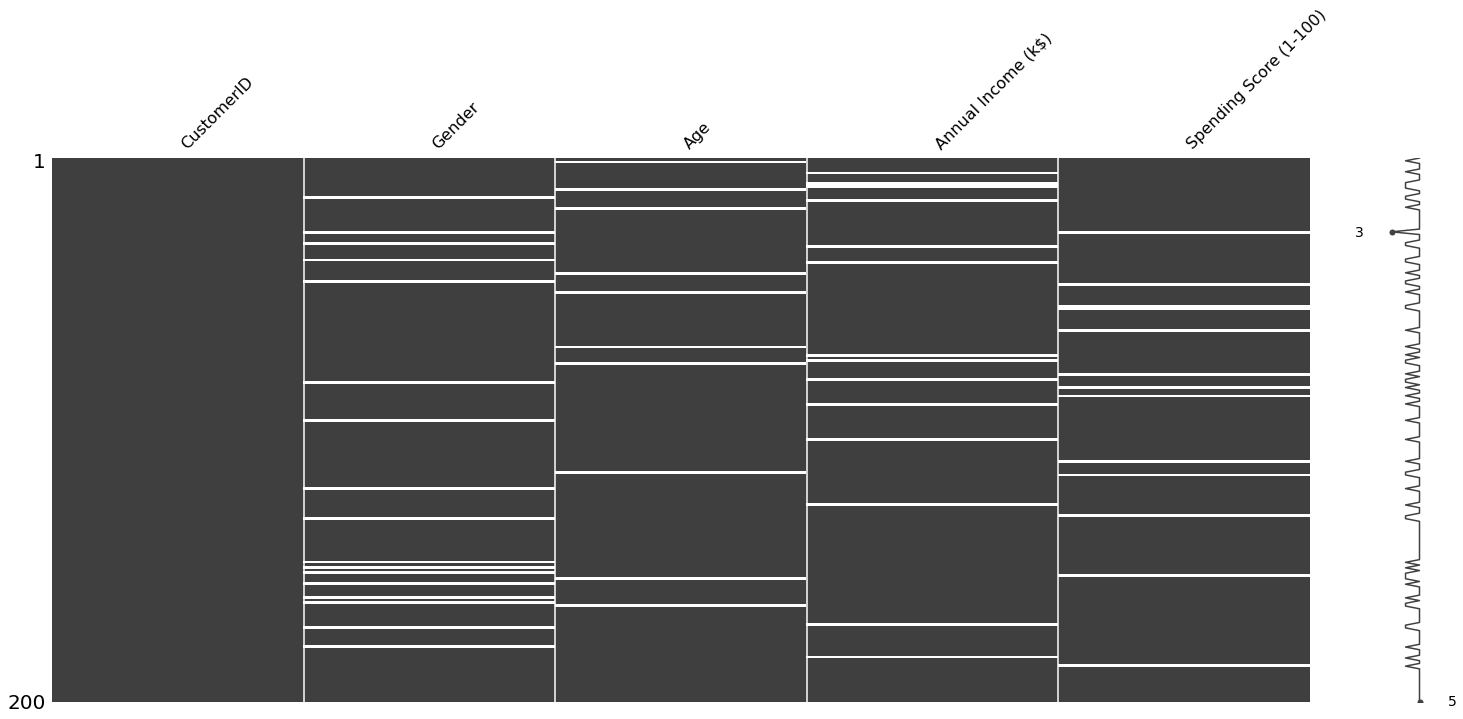

In [7]:
msno.matrix(df)

### Heatmaps are used to visualize correlation matrices which show the correlation of values between different columns. If the correlation among columns is high, the missing data is called Missing Data Not At Random(MNAR)

<AxesSubplot:>

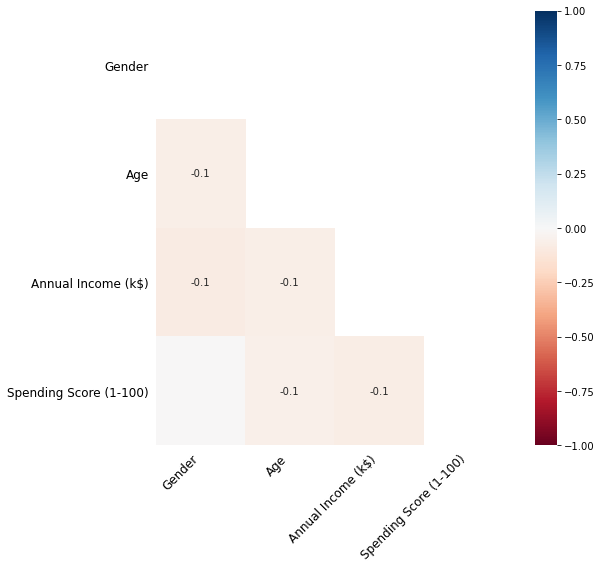

In [8]:
msno.heatmap(df, figsize=(8,8), fontsize=12)

### The correlation is not significantly high. Hence the missing values are Missing Completely At Random (MCAR)

### It shows bars that are proportional to the number of non-missing values as well as providing the actual number of non-missing values. We get an idea of how much of each column is missing.

<AxesSubplot:>

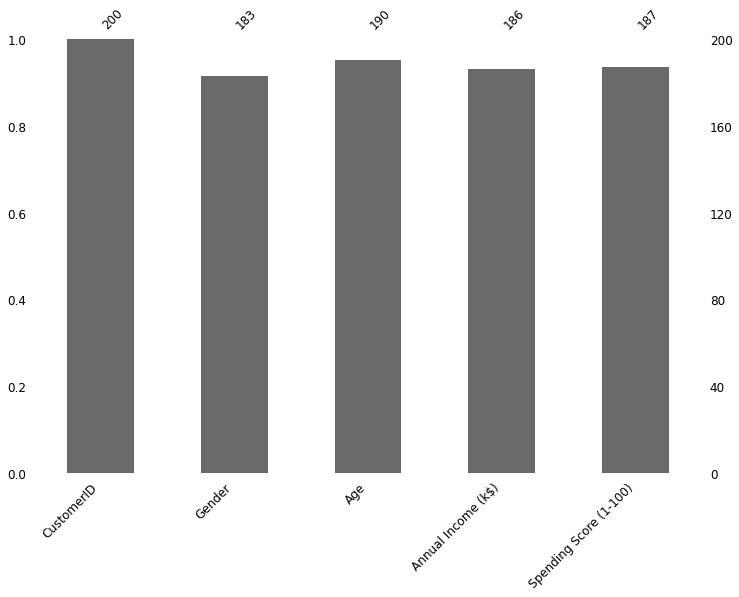

In [9]:
msno.bar(df, figsize=(12,8), fontsize=12)

### First, we will handle the missing values of 'Age'.
### Comparison between Median imputation and random sample imputation

In [10]:
age_median = df['Age'].median()
age_median


36.0

In [11]:
df['Age_Median'] = df['Age'].fillna(age_median)

In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Median
0,1,Male,19.0,15.0,39.0,19.0
1,2,Male,NaN,15.0,81.0,36.0
2,3,Female,20.0,16.0,6.0,20.0
3,4,Female,23.0,16.0,77.0,23.0
4,5,Female,31.0,17.0,40.0,31.0


### Finding missing values of 'Age' using Random Sample Imputation

In [13]:
df['Age_Random']=df['Age']
random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)
random_sample.index = df[df['Age'].isnull()].index
df.loc[df['Age'].isnull(), 'Age_Random']=random_sample

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Median,Age_Random
0,1,Male,19.0,15.0,39.0,19.0,19.0
1,2,Male,NaN,15.0,81.0,36.0,63.0
2,3,Female,20.0,16.0,6.0,20.0,20.0
3,4,Female,23.0,16.0,77.0,23.0,23.0
4,5,Female,31.0,17.0,40.0,31.0,31.0


### Comparison between Median Imputation and Random Sample Imputation

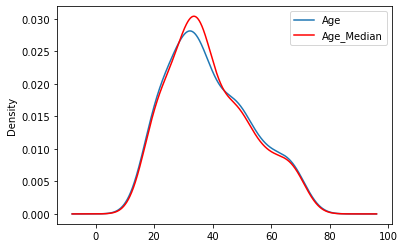

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_Median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

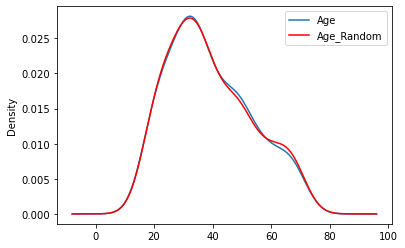

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_Random'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [16]:
print(df['Age'].std())
df['Age_Median'].std()

14.063159635198996


13.720870469185286

In [17]:
print(df['Age'].std())
df['Age_Random'].std()

14.063159635198996


14.2009979124195

### Handling Missing Values of 'Annual Income (k$)'

In [18]:
df[['CustomerID', 'Annual Income (k$)']].head()

,CustomerID,Annual Income (k$)
0,1,15.0
1,2,15.0
2,3,16.0
3,4,16.0
4,5,17.0


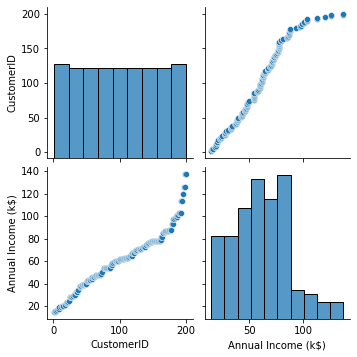

In [19]:
sns.pairplot(df[['CustomerID', 'Annual Income (k$)']])

Parameters [ 5.12226381e-04  3.40070510e-01 -1.29328255e+06  1.29330207e+06]
RMSE: 5.471340997763644
R-squared: 0.9559500163767797


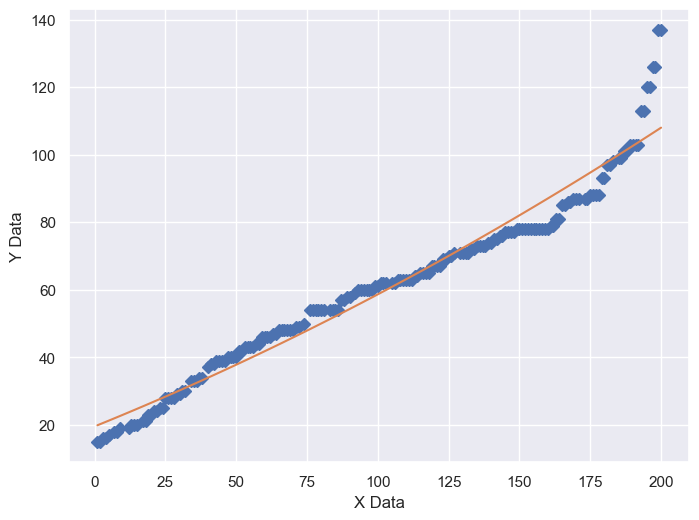

In [91]:
import scipy
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

index=df[df['Annual Income (k$)'].notnull()].index
X=df['CustomerID'].iloc[index].reset_index(drop=True).values
Y=df['Annual Income (k$)'].dropna().reset_index(drop=True).values

def func(x, a0, a1, a2, offset): # Sigmoid A With Offset
    return (a0*x**2) + (a1*x) + (a2) + offset

# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(X, *parameterTuple)
    return np.sum((Y - val) ** 2.0)

def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(X)
    minX = min(X)
    maxY = max(Y)
    minY = min(Y)

    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for a0
    parameterBounds.append([minX, maxX]) # search bounds for a1
    parameterBounds.append([minX, maxX]) # search bounds for a2
    parameterBounds.append([0.0, maxY]) # search bounds for Offset

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, X, Y, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(X, *fittedParameters) 

absError = modelPredictions - Y

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(Y))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(X, Y,  'D')

    # create data for the fitted equation plot
    xModel = np.linspace(min(X), max(X))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)



In [92]:
index = df[df['Annual Income (k$)'].isnull()].index
Xtest = df['CustomerID'].iloc[index].values
#predicted_annual_income = func(Xtest, *fittedParameters)
predicted_annual_income = list(map(int, func(Xtest, *fittedParameters)))
#print(predicted_annual_income)
df[['Annual Income (k$)']].head(10)
new_values = pd.Series(predicted_annual_income, index=index)
df['Annual Income_Regression'] = df['Annual Income (k$)']


In [93]:
df['Annual Income_Regression'].fillna(value=new_values, inplace=True)

In [94]:

print(new_values)
df['Annual Income_Regression'].head(20)

5      21
9      22
10     23
15     25
32     31
38     33
72     47
74     47
81     50
90     54
103    60
127    71
171    93
183    99
dtype: int64


0     15.0
1     15.0
2     16.0
3     16.0
4     17.0
5     21.0
6     18.0
7     18.0
8     19.0
9     22.0
10    23.0
11    19.0
12    20.0
13    20.0
14    20.0
15    25.0
16    21.0
17    21.0
18    23.0
19    23.0
Name: Annual Income_Regression, dtype: float64

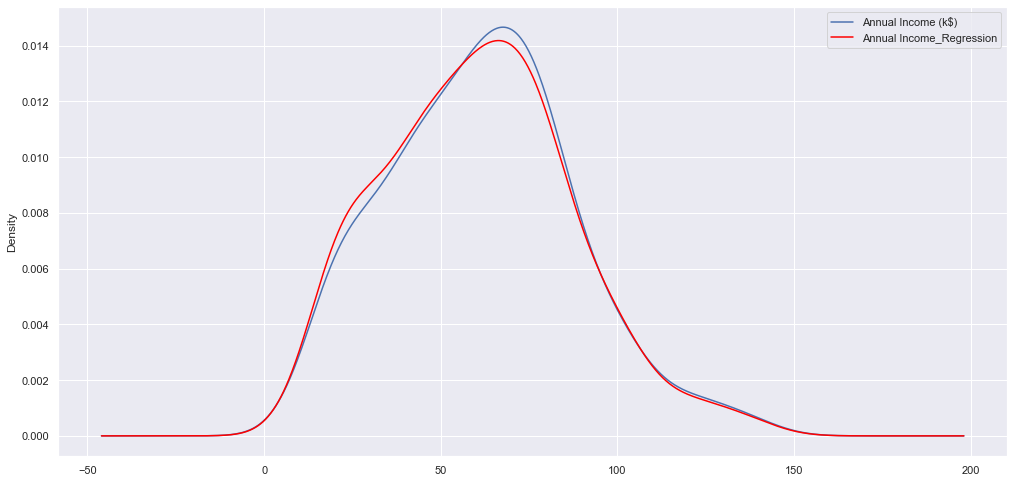

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Annual Income (k$)'].plot(kind='kde', ax=ax)
df['Annual Income_Regression'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [96]:
df['Annual Income_Regression'].isnull().sum()

0

In [26]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Median,Age_Random,Annual Income_Regression
0,1,Male,19.0,15.0,39.0,19.0,19.0,15.0
1,2,Male,NaN,15.0,81.0,36.0,63.0,15.0
2,3,Female,20.0,16.0,6.0,20.0,20.0,16.0
3,4,Female,23.0,16.0,77.0,23.0,23.0,16.0
4,5,Female,31.0,17.0,40.0,31.0,31.0,17.0


### Handling Missing Values for 'Gender' using unsupervised algorithm

In [27]:
df_male = df.loc[df['Gender']=='Male']
df_female = df.loc[df['Gender']=='Female']

Male Age_Random Mean = 40.28395061728395
Female Age_Random Mean = 38.666666666666664


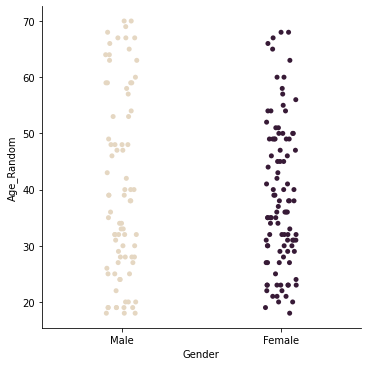

In [29]:
sns.catplot(x="Gender", y="Age_Random", palette="ch:.25", data=df)
print(f"Male Age_Random Mean = {df_male['Age_Random'].mean()}")
print(f"Female Age_Random Mean = {df_female['Age_Random'].mean()}")

Male Annual Income_Regression Mean = 62.19753086419753
Female Annual Income_Regression Mean = 58.96078431372549


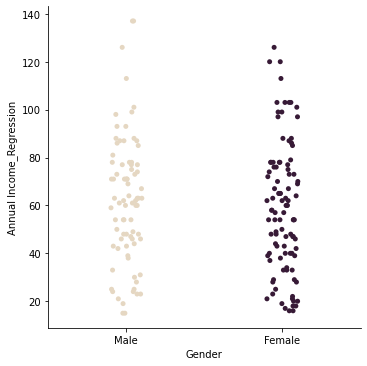

In [30]:
sns.catplot(x="Gender", y="Annual Income_Regression", palette="ch:.25", data=df)
print(f"Male Annual Income_Regression Mean = {df_male['Annual Income_Regression'].mean()}")
print(f"Female Annual Income_Regression Mean = {df_female['Annual Income_Regression'].mean()}")

Male CustomerID Mean = 103.53086419753086
Female CustomerID Mean = 96.38235294117646


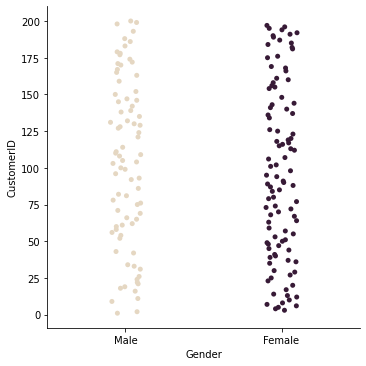

In [31]:
sns.catplot(x="Gender", y="CustomerID", palette="ch:.25", data=df)
print(f"Male CustomerID Mean = {df_male['CustomerID'].mean()}")
print(f"Female CustomerID Mean = {df_female['CustomerID'].mean()}")

In [32]:
from sklearn.cluster import KMeans

train = df.loc[:, ['CustomerID','Age_Random','Annual Income_Regression']]
gender_model = KMeans(n_clusters=2)
gender_predictions = gender_model.fit_predict(train)
gender_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [33]:
df['Gender_Int']=(df['Gender']=='Male').astype(int)
df['Gender_Int']=(df['Gender']=='Female').astype(int)
df[['Gender_Int', 'CustomerID']].corr()

,Gender_Int,CustomerID
Gender_Int,1.000000,-0.072762
CustomerID,-0.072762,1.000000


Text(0.5, 0, 'Annual Income')

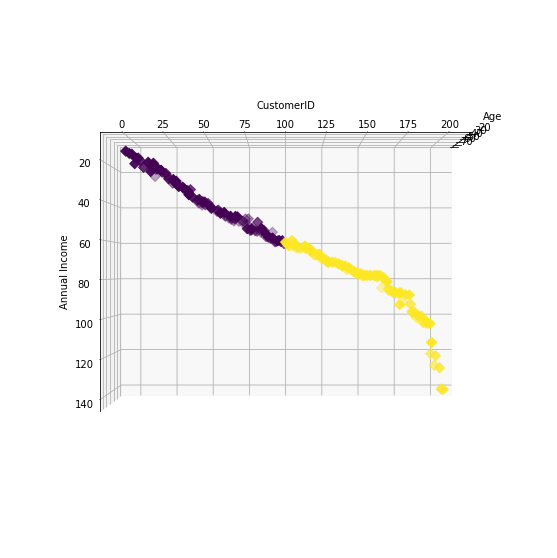

In [34]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

x = df['Age_Random']
z = df['Annual Income_Regression']
y = df['CustomerID']

ax.scatter3D(x,y,z, marker="D", c=gender_predictions, s=50, cmap='viridis')
ax.view_init(180, 0)
ax.set_xlabel('Age')
ax.set_ylabel('CustomerID')
ax.set_zlabel('Annual Income')


In [35]:
df[['Gender_Int', 'Age_Random']].corr()

,Gender_Int,Age_Random
Gender_Int,1.000000,-0.031209
Age_Random,-0.031209,1.000000


In [36]:
df[['Gender_Int', 'Annual Income_Regression']].corr()

,Gender_Int,Annual Income_Regression
Gender_Int,1.000000,-0.061541
Annual Income_Regression,-0.061541,1.000000


In [37]:
df[['Gender_Int', 'Spending Score (1-100)']].corr()

,Gender_Int,Spending Score (1-100)
Gender_Int,1.000000,0.044399
Spending Score (1-100),0.044399,1.000000


Text(0.5, 0, 'Annual Income')

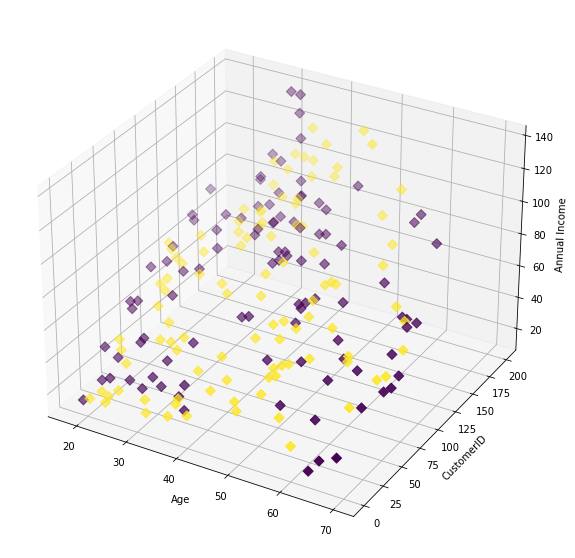

In [38]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

x = df['Age_Random']
z = df['Annual Income_Regression']
y = df['CustomerID']

ax.scatter3D(x,y,z, marker="D", c=df['Gender_Int'], s=50, cmap='viridis')
#ax.view_init(180, 0)
ax.set_xlabel('Age')
ax.set_ylabel('CustomerID')
ax.set_zlabel('Annual Income')


In [39]:
def genderify(binary):
    if binary == 1:
        return 'Male'
    else:
        return 'Female'
        

In [40]:
gender_predictions = list(map(genderify, gender_predictions))


In [41]:
# Predicted values by clustering algorithm...
index = df[df['Gender'].isnull()].index
df_gender_predictions = pd.Series(gender_predictions)
df_gender_predictions = df_gender_predictions.iloc[index]
df_gender_predictions

14     Female
27     Female
31     Female
37     Female
45     Female
82     Female
96     Female
121      Male
132      Male
148      Male
150      Male
152      Male
156      Male
161      Male
163      Male
172      Male
179      Male
dtype: object

In [42]:
df['Gender_UA'] = df['Gender']
df['Gender_UA'].fillna(value=df_gender_predictions, inplace=True)

In [43]:
df['Gender_UA'].isnull().sum()

0

In [44]:
index = df[df['Gender'].isnull()].index

In [45]:
df['Gender_UA'].iloc[index]

14     Female
27     Female
31     Female
37     Female
45     Female
82     Female
96     Female
121      Male
132      Male
148      Male
150      Male
152      Male
156      Male
161      Male
163      Male
172      Male
179      Male
Name: Gender_UA, dtype: object

Text(0.5, 0.98, 'The distribution of gender values in the dataset')

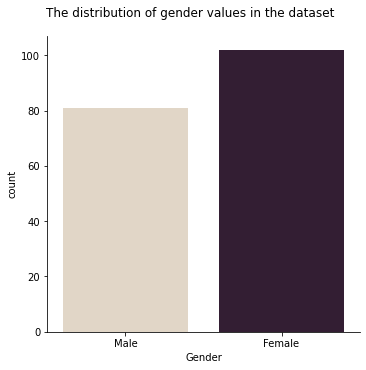

In [46]:
ctplt = sns.catplot(x="Gender", kind="count", palette="ch:.25", data=df)
ctplt.fig.subplots_adjust(top=0.9)
ctplt.fig.suptitle('The distribution of gender values in the dataset')


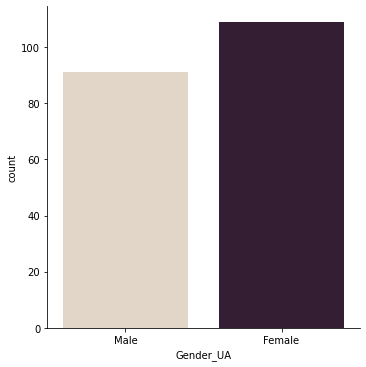

In [47]:
sns.catplot(x="Gender_UA", kind="count", palette="ch:.25", data=df)

Handling missing values of 'Gender' using random sample imputation

In [48]:
df['Gender_Random']=df['Gender']
random_sample=df['Gender'].dropna().sample(df['Gender'].isnull().sum(), random_state=0)
random_sample.index = df[df['Gender'].isnull()].index
df.loc[df['Gender'].isnull(), 'Gender_Random']=random_sample

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Median,Age_Random,Annual Income_Regression,Gender_Int,Gender_UA,Gender_Random
0,1,Male,19.0,15.0,39.0,19.0,19.0,15.0,0,Male,Male
1,2,Male,NaN,15.0,81.0,36.0,63.0,15.0,0,Male,Male
2,3,Female,20.0,16.0,6.0,20.0,20.0,16.0,1,Female,Female
3,4,Female,23.0,16.0,77.0,23.0,23.0,16.0,1,Female,Female
4,5,Female,31.0,17.0,40.0,31.0,31.0,17.0,1,Female,Female


In [49]:
df['Gender_Random'].iloc[index]

14     Female
27     Female
31     Female
37     Female
45     Female
82     Female
96     Female
121    Female
132    Female
148    Female
150    Female
152    Female
156    Female
161    Female
163    Female
172    Female
179      Male
Name: Gender_Random, dtype: object

Text(0.5, 0.98, 'The distribution of gender values in the SECOND half of the dataset')

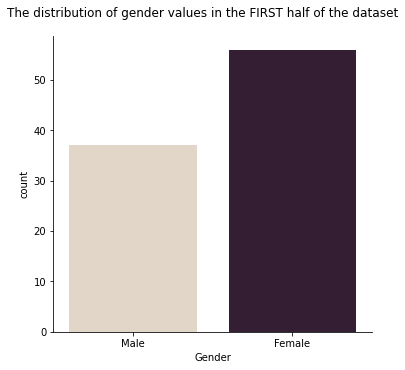

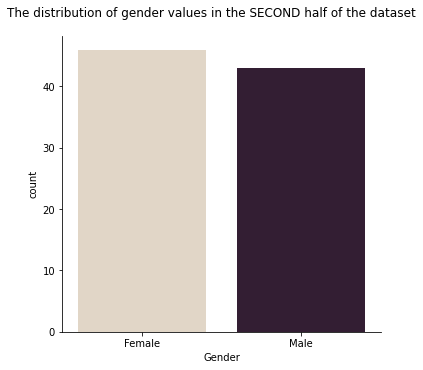

In [50]:
gender_0to100 = df[['Gender']].iloc[1:101]
ctplt = sns.catplot(x="Gender", kind="count", palette="ch:.25", data=gender_0to100)
ctplt.fig.subplots_adjust(top=0.9)
ctplt.fig.suptitle('The distribution of gender values in the FIRST half of the dataset')

gender_100to200 = df[['Gender']].iloc[101:201]
ctplt2 = sns.catplot(x="Gender", kind="count", palette="ch:.25", data=gender_100to200)
ctplt2.fig.subplots_adjust(top=0.9)
ctplt2.fig.suptitle('The distribution of gender values in the SECOND half of the dataset')

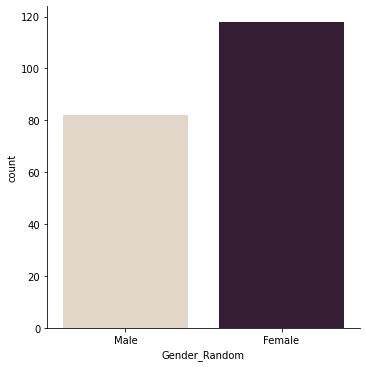

In [51]:
sns.catplot(x="Gender_Random", kind="count", palette="ch:.25", data=df)

Text(0.5, 0.98, 'The distribution of gender values in "Gender_UA" feature')

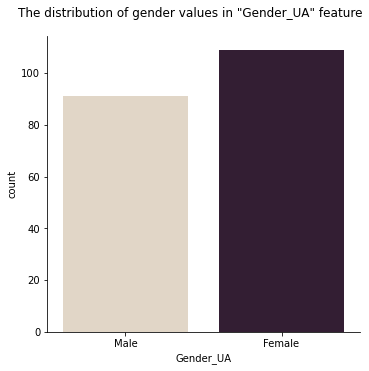

In [52]:
ctplt = sns.catplot(x="Gender_UA", kind="count", palette="ch:.25", data=df)
ctplt.fig.subplots_adjust(top=0.9)
ctplt.fig.suptitle('The distribution of gender values in "Gender_UA" feature')

### Handling missing values of 'Spend Score'

In [53]:
ss_null_index = df[df['Spending Score (1-100)'].isnull()].index
df.iloc[ss_null_index]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Median,Age_Random,Annual Income_Regression,Gender_Int,Gender_UA,Gender_Random
27,28,NaN,35.0,28.0,NaN,35.0,35.0,28.0,0,Female,Female
46,47,Female,50.0,40.0,NaN,50.0,50.0,40.0,1,Female,Female
54,55,Female,50.0,43.0,NaN,50.0,50.0,43.0,1,Female,Female
55,56,Male,47.0,43.0,NaN,47.0,47.0,43.0,0,Male,Male
63,64,Female,54.0,47.0,NaN,54.0,54.0,47.0,1,Female,Female
79,80,Female,49.0,54.0,NaN,49.0,49.0,54.0,1,Female,Female
84,85,Female,21.0,54.0,NaN,21.0,21.0,54.0,1,Female,Female
87,88,Female,22.0,57.0,NaN,22.0,22.0,57.0,1,Female,Female
111,112,Female,19.0,63.0,NaN,19.0,19.0,63.0,1,Female,Female
116,117,Female,63.0,65.0,NaN,63.0,63.0,65.0,1,Female,Female


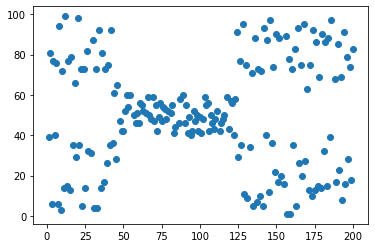

In [54]:
x = df['CustomerID'].dropna()
y = df['Spending Score (1-100)']
plt.scatter(x,y)
plt.show()

In [55]:
train = df.loc[:, ['CustomerID','Spending Score (1-100)']].dropna()
ss_model = KMeans(n_clusters=5)
ss_predictions = ss_model.fit_predict(train)

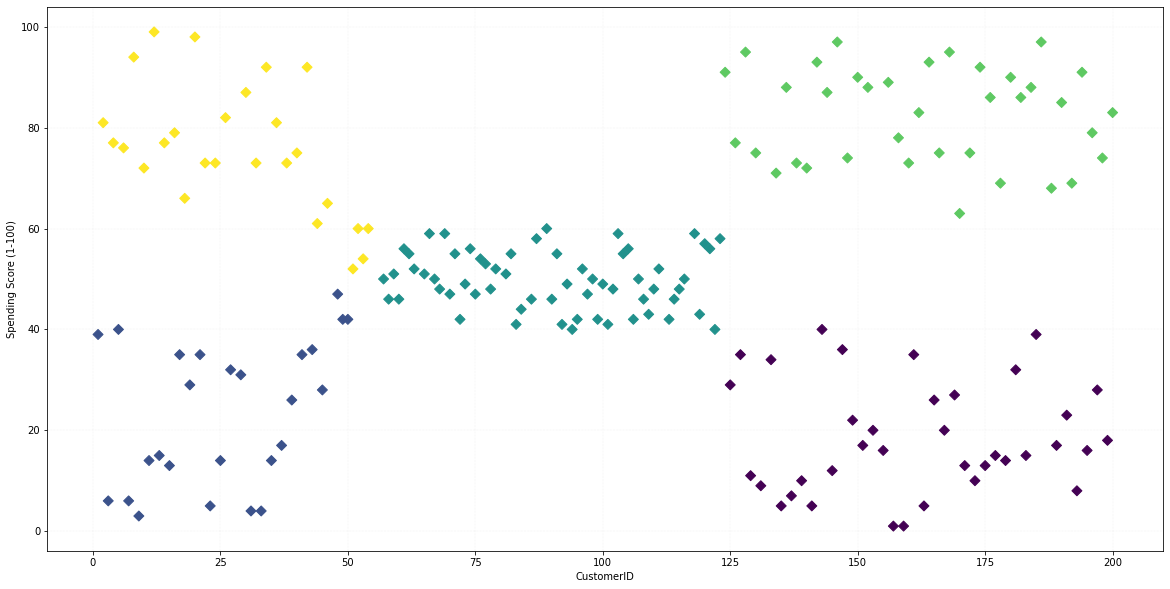

In [56]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes()
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

x = df.dropna(subset=['Spending Score (1-100)'])
x = x['CustomerID']
y = df['Spending Score (1-100)'].dropna()
#w = df['CustomerID'].iloc[index]
#print(w)
#z = df['Age_Random'].iloc[index]

ax.scatter(x,y, marker="D", c=ss_predictions, s=50, cmap='viridis')
#sns.scatterplot(z, w, size=20, color="red", marker = "D")
#ax.view_init(180, 0)
ax.set_xlabel('CustomerID')
ax.set_ylabel('Spending Score (1-100)')
#ax.set_zlabel('Annual Income')


plt.show()

In [57]:
df_cluster_left = df.loc[df['CustomerID']<50].dropna()
df_cluster_center = df.loc[(df['CustomerID']>50) & (df['CustomerID']<125)].dropna()
df_cluster_right = df.loc[df['CustomerID']>125].dropna()

In [58]:
df['Spending Score_Random'] = df['Spending Score (1-100)']
# df containing all spending score null values...
df_ss_null = df.iloc[ss_null_index]
left_cluster_random_sample = df_cluster_left['Spending Score (1-100)'].sample(df_ss_null.loc[df_ss_null['CustomerID']<=50].shape[0], random_state=0).reset_index(drop=True)
center_cluster_random_sample = df_cluster_center['Spending Score (1-100)'].sample(df_ss_null.loc[(df_ss_null['CustomerID']>50)&(df_ss_null['CustomerID']<125)].shape[0], random_state=0).reset_index(drop=True)
right_cluster_random_sample = df_cluster_right['Spending Score (1-100)'].sample(df_ss_null.loc[df_ss_null['CustomerID']>125].shape[0], random_state=0).reset_index(drop=True)    

In [59]:
print(left_cluster_random_sample)
print(right_cluster_random_sample)
print(center_cluster_random_sample)

0    98.0
1    87.0
Name: Spending Score (1-100), dtype: float64
0    13.0
1    92.0
2    15.0
Name: Spending Score (1-100), dtype: float64
0    52.0
1    50.0
2    42.0
3    60.0
4    51.0
5    54.0
6    52.0
7    43.0
Name: Spending Score (1-100), dtype: float64


In [60]:
left_cluster_random_sample.index = df['Spending Score_Random'].loc[(df['CustomerID']<=50)&(df['Spending Score_Random'].isnull())].index
df.loc[(df['CustomerID']<=50)&(df['Spending Score_Random'].isnull()), 'Spending Score_Random'] = left_cluster_random_sample
df['Spending Score_Random'].loc[df['CustomerID']<=50]

0     39.0
1     81.0
2      6.0
3     77.0
4     40.0
5     76.0
6      6.0
7     94.0
8      3.0
9     72.0
10    14.0
11    99.0
12    15.0
13    77.0
14    13.0
15    79.0
16    35.0
17    66.0
18    29.0
19    98.0
20    35.0
21    73.0
22     5.0
23    73.0
24    14.0
25    82.0
26    32.0
27    98.0
28    31.0
29    87.0
30     4.0
31    73.0
32     4.0
33    92.0
34    14.0
35    81.0
36    17.0
37    73.0
38    26.0
39    75.0
40    35.0
41    92.0
42    36.0
43    61.0
44    28.0
45    65.0
46    87.0
47    47.0
48    42.0
49    42.0
Name: Spending Score_Random, dtype: float64

In [61]:
center_cluster_random_sample.index = df['Spending Score_Random'].loc[(df['CustomerID']>50)&(df['CustomerID']<=125)&(df['Spending Score_Random'].isnull())].index
df.loc[(df['CustomerID']>50)&(df['CustomerID']<=125)&(df['Spending Score_Random'].isnull()), 'Spending Score_Random'] = center_cluster_random_sample
df['Spending Score_Random'].loc[(df['CustomerID']>50)&(df['CustomerID']<=125)]

50     52.0
51     60.0
52     54.0
53     60.0
54     52.0
       ... 
120    56.0
121    40.0
122    58.0
123    91.0
124    29.0
Name: Spending Score_Random, Length: 75, dtype: float64

In [62]:
right_cluster_random_sample.index = df['Spending Score_Random'].loc[(df['CustomerID']>125)&(df['Spending Score_Random'].isnull())].index
df.loc[(df['CustomerID']>125)&(df['Spending Score_Random'].isnull()), 'Spending Score_Random'] = right_cluster_random_sample
df['Spending Score_Random'].loc[df['CustomerID']>125]

125    77.0
126    35.0
127    95.0
128    11.0
129    75.0
       ... 
195    79.0
196    28.0
197    74.0
198    18.0
199    83.0
Name: Spending Score_Random, Length: 75, dtype: float64

In [63]:
df['Spending Score_Random'].isnull().sum()

0

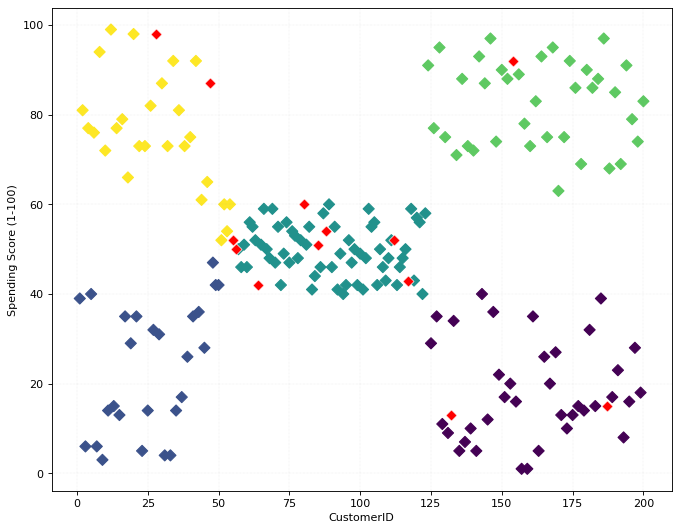

In [64]:
fig = plt.figure(figsize=(10, 8), dpi=80)
ax = plt.axes()
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

y = df['Spending Score (1-100)'].dropna()
x = df.dropna(subset=['Spending Score (1-100)'])
x = x['CustomerID']
z = df['Spending Score_Random'].dropna()
w = df['CustomerID'].iloc[ss_null_index]
#print(w)
z = df['Spending Score_Random'].iloc[ss_null_index]

ax.scatter(x,y, marker="D", c=ss_predictions, s=50, cmap='viridis')
sns.scatterplot(w, z, s=50, color="red", marker = "D")
#ax.view_init(180, 0)
ax.set_xlabel('CustomerID')
ax.set_ylabel('Spending Score (1-100)')
#ax.set_zlabel('Annual Income')


plt.show()

### K-modes

In [65]:
from kmodes.kmodes import KModes
data = df[['Gender', 'Spending Score (1-100)']].dropna()
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 158.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 157.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1, cost: 154.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2, cost: 154.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2, cost: 155.0
Best run was number 3
[['Male' '46.0']
 ['Female' '42.0']
 ['Female' '40.0']
 ['Female' '35.0']]


In [66]:
km = KModes(n_clusters=13, init='Huang', n_init=1, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 77, cost: 134.0
Run 1, iteration: 2/100, moves: 0, cost: 134.0
[['Male' '55.0']
 ['Male' '35.0']
 ['Female' '50.0']
 ['Female' '91.0']
 ['Female' '42.0']
 ['Female' '48.0']
 ['Female' '35.0']
 ['Female' '55.0']
 ['Female' '46.0']
 ['Male' '56.0']
 ['Female' '29.0']
 ['Male' '46.0']
 ['Male' '52.0']]


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 243.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 160.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 157.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 80, cost: 155.0
Run 1, iteration: 2/100, moves: 0, cost: 155.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 77, cost: 149.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 149.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 151.0
Init: initializing centroids
Init: initializing clusters
Start

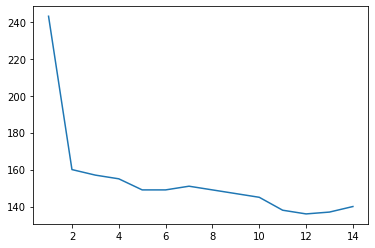

In [67]:
cost = []
for num_clusters in list(range(1,15)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
y = np.array([i for i in range(1,15,1)])
plt.plot(y,cost)

In [68]:
df['Spending Score (1-100)'].iloc[index]

14     13.0
27      NaN
31     73.0
37     73.0
45     65.0
82     41.0
96     47.0
121    40.0
132    34.0
148    22.0
150    17.0
152    20.0
156     1.0
161    83.0
163    93.0
172    10.0
179    90.0
Name: Spending Score (1-100), dtype: float64

In [69]:
km.predict(ss_val)

NameError: name 'ss_val' is not defined

In [ ]:
ss = df['Spending Score (1-100)'].iloc[index]
ss_val = ss.values
print(type(ss_val))

<class 'numpy.ndarray'>


In [ ]:
ss_val = ss_val.reshape(-1,1)

<AxesSubplot:xlabel='Spending Score (1-100)'>

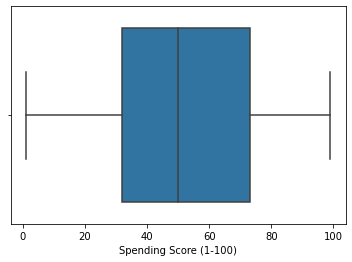

In [ ]:
sns.boxplot('Spending Score (1-100)', data=df)

In [ ]:
sorted_ss = df[['Spending Score (1-100)']].sort_values('Spending Score (1-100)')

In [ ]:
sorted_ss.dropna(inplace=True)
sorted_ss = sorted_ss.reset_index(drop=True)
sorted_ss

,Spending Score (1-100)
0,1.0
1,1.0
2,3.0
3,4.0
4,4.0
...,...
182,95.0
183,97.0
184,97.0
185,98.0


In [ ]:
index

Int64Index([14, 27, 31, 37, 45, 82, 96, 121, 132, 148, 150, 152, 156, 161, 163,
            172, 179],
           dtype='int64')

In [ ]:
df.isnull().sum()

CustomerID                   0
Gender                      17
Age                         10
Annual Income (k$)          14
Spending Score (1-100)      13
Age_Median                   0
Age_Random                   0
Annual Income_Regression     0
Gender_Int                   0
Gender_UA                    0
Gender_Random                0
dtype: int64

# Outlier Analysis

### Finding outliers using boxplot

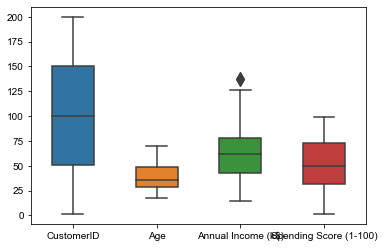

In [70]:
sns.boxplot(data=df[['CustomerID','Age','Annual Income (k$)', 'Spending Score (1-100)']], width=0.5, fliersize=10)
sns.set(rc={'figure.figsize':(17,8.27)})

### 'Annual Income' contains outlier...

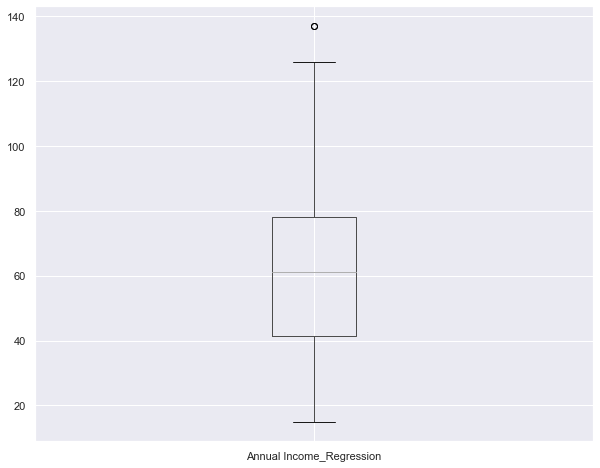

In [71]:
a, b = df.boxplot(column="Annual Income_Regression", return_type="both", figsize=(10,8))

In [72]:
b

{'whiskers': [<matplotlib.lines.Line2D at 0x1ddd7d5c520>,
 'caps': [<matplotlib.lines.Line2D at 0x1ddd7d5cbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ddd7d5c1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ddd7d662e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ddd7d66640>],
 'means': []}

In [73]:
print(b["fliers"])
print(type(b["fliers"]))

<class 'list'>


In [74]:
outliers = [flier.get_ydata() for flier in b["fliers"]]
print(outliers[0])

[137. 137.]


In [75]:
df.loc[df['Annual Income_Regression']==137].index[1]

199

### Instead of removing outliers, we can correct them using regression model that we created earlier!

In [76]:
index = df[df['Annual Income (k$)'].isnull()].index
Xtest = df['CustomerID'].iloc[index].values
#predicted_annual_income = func(Xtest, *fittedParameters)
predicted_annual_income = list(map(int, func(Xtest, *fittedParameters)))
#print(predicted_annual_income)
df[['Annual Income (k$)']].head(10)
new_values = pd.Series(predicted_annual_income, index=index)
df['Annual Income_Regression'] = df['Annual Income (k$)']


In [77]:
corrected_value = list(map(int, func(df['CustomerID'].loc[df['Annual Income_Regression']==137], *fittedParameters)))
print(corrected_value)

[107, 108]


In [78]:
extremes = [extremes.get_ydata() for extremes in b["whiskers"]]
print(extremes)

[array([41.5, 15. ]), array([ 78., 126.])]


### Here, 15 and 126 are lower and upper extremes respectively... 
### Since predicted values fit in the range of annual income data, we can replace the outliers...

In [79]:
indices = df.loc[df['Annual Income_Regression']==137].index

for i in range(0, len(corrected_value)):
    df.at[indices[i], 'Annual Income_Regression'] = corrected_value[i]
    print(df['Annual Income_Regression'].iloc[indices[i]])
        
        

107.0
108.0


In [80]:
df.iloc[indices]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Median,Age_Random,Annual Income_Regression,Gender_Int,Gender_UA,Gender_Random,Spending Score_Random
198,199,Male,32.0,137.0,18.0,32.0,32.0,107.0,0,Male,Male,18.0
199,200,Male,30.0,137.0,83.0,30.0,30.0,108.0,0,Male,Male,83.0


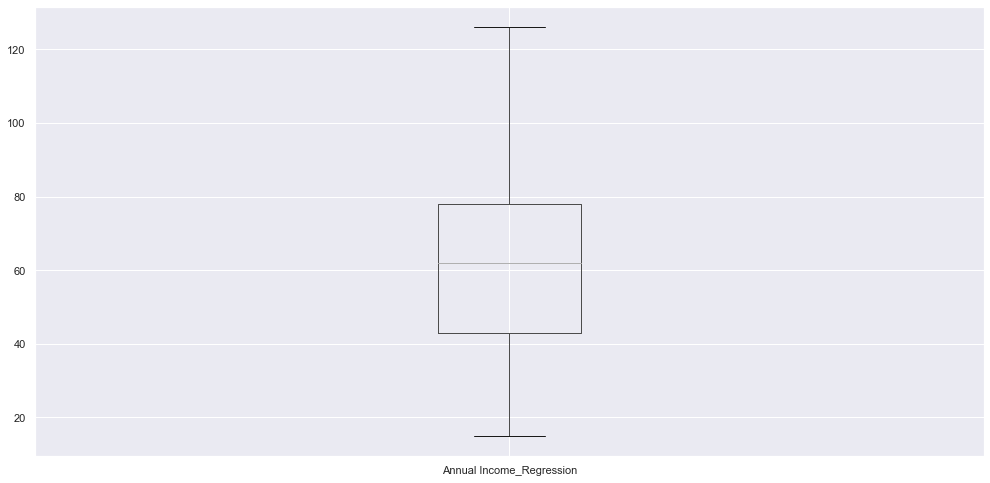

In [81]:
a, b = df.boxplot(column="Annual Income_Regression", return_type="both")

# Model training using BIRCH algorithm

In [82]:
from sklearn.cluster import Birch

In [111]:
sil_list = []

In [113]:
def K_finder(X):
  sil = {}
  kmax = 10

  # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
  for k in range(2, kmax+1):
    brc = Birch(branching_factor=50, n_clusters=k, threshold=1.5)
    brc.fit(X)
    labels = brc.predict(X)
    score=metrics.silhouette_score(X, labels, metric = 'euclidean')
    sil.__setitem__(k, score)

  fig, ax = plt.subplots(1,1)
  ax.plot(range(2,kmax+1), sil.values())
  ax.set_title(f"{X.columns[0]} vs {X.columns[1]}")
  ax.set_xlabel("Number of clusters")
  ax.set_ylabel("Silhouette Score")
  sil_list.append(sil[max(sil, key=sil.get)])
  return max(sil, key=sil.get)

In [84]:
def birch_input(col):
    X = df[[col, 'Spending Score_Random']]
    fig, ax = plt.subplots(1,1)
    fig.set_figheight(8)
    fig.set_figwidth(10)
    ax.scatter(X.iloc[:,0], X.iloc[:,1], alpha=0.7, edgecolors='b')
    ax.set_xlabel(col)
    ax.set_ylabel('Spending Score')
    ax.set_title(f"{col} Vs Spending Score")
    return X


In [85]:
def birch_trainer(X, k):
    brc = Birch(branching_factor=25, n_clusters=k, threshold=1.5)
    brc.fit(X)
    labels = brc.predict(X)
    fig, ax = plt.subplots(1,1)
    fig.set_figheight(8)
    fig.set_figwidth(10)
    ax.set_xlabel(X.columns.values.tolist()[0])
    ax.set_ylabel('Spending Score')
    ax.set_title(f"{X.columns.values.tolist()[0]} Vs Spending Score")
    ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, alpha=1, edgecolors='face')

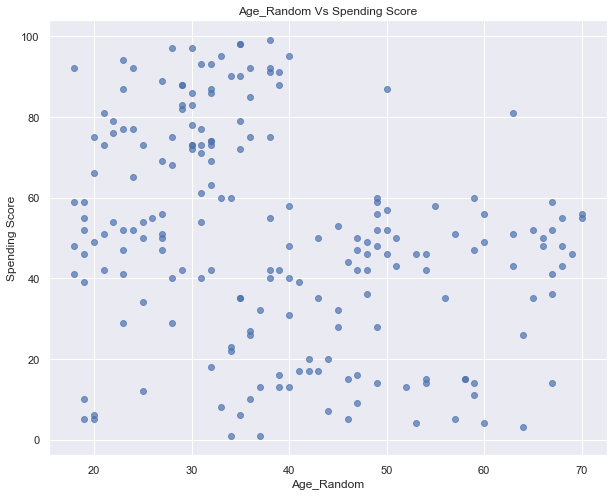

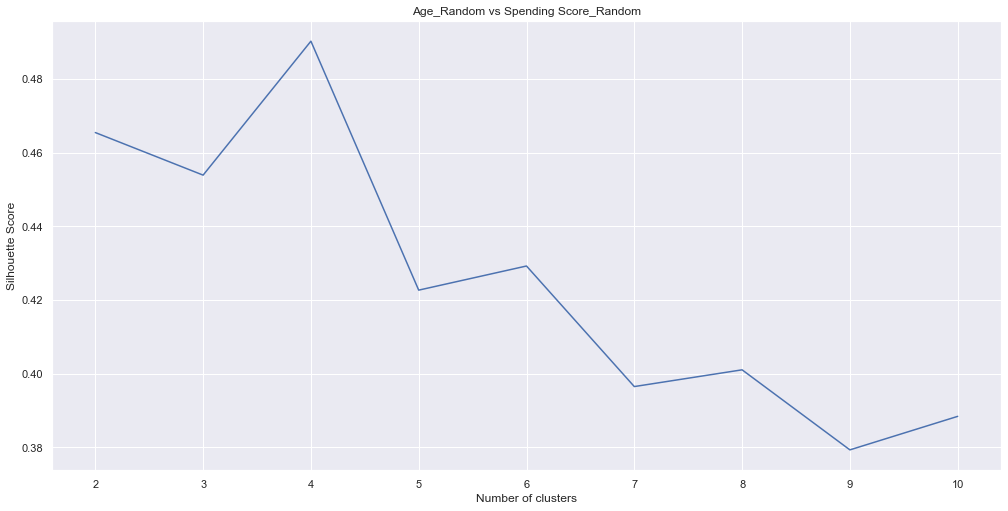

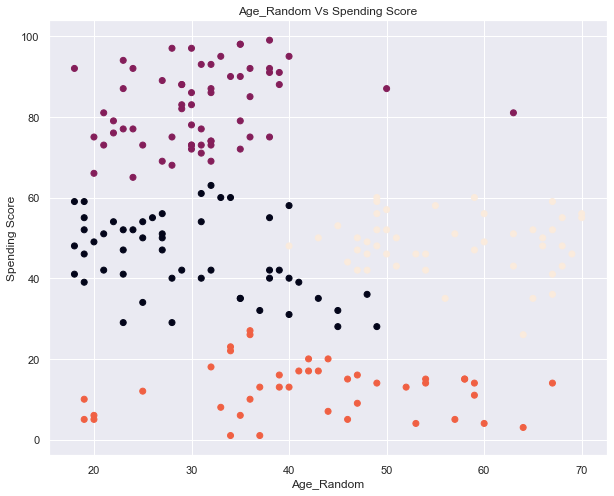

In [114]:
X = birch_input('Age_Random')
k = K_finder(X)
birch_trainer(X, k)

In [89]:
df.isnull().sum()

CustomerID                   0
Gender                      17
Age                         10
Annual Income (k$)          14
Spending Score (1-100)      13
Age_Median                   0
Age_Random                   0
Annual Income_Regression    14
Gender_Int                   0
Gender_UA                    0
Gender_Random                0
Spending Score_Random        0
dtype: int64

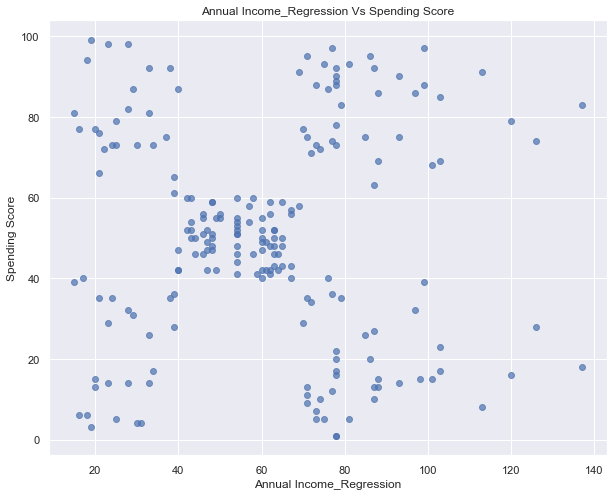

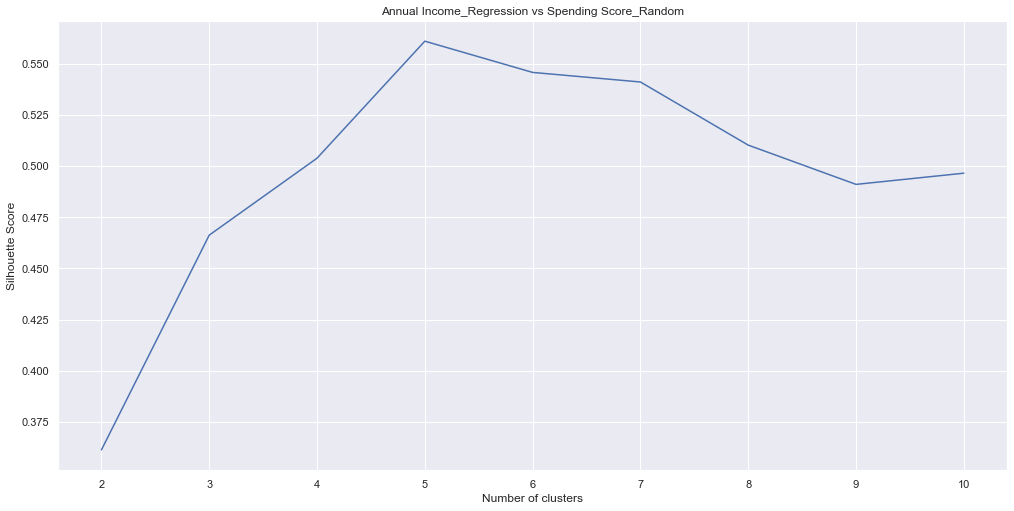

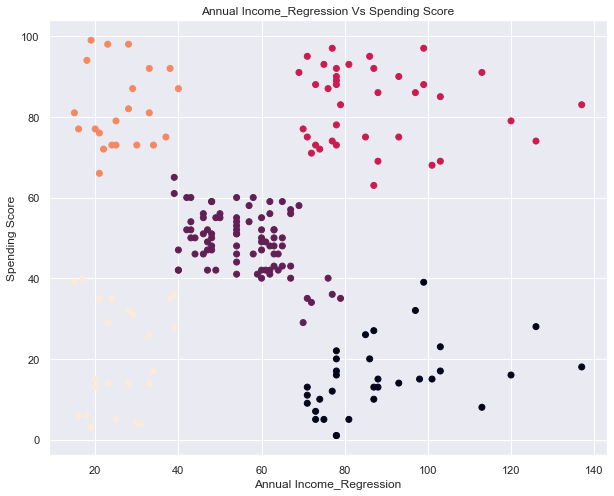

In [115]:
X = birch_input('Annual Income_Regression')
k = K_finder(X)
birch_trainer(X, k)

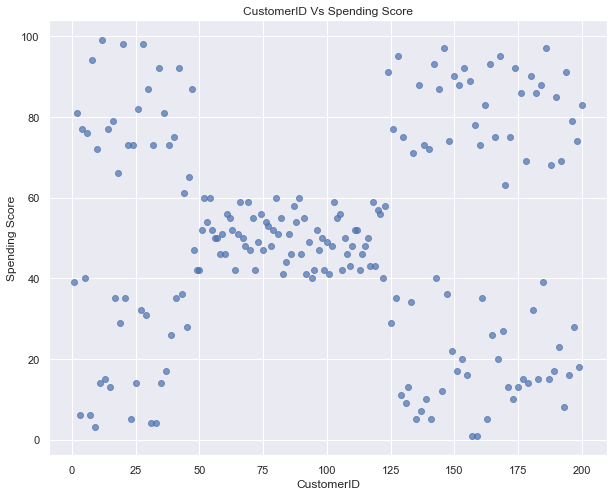

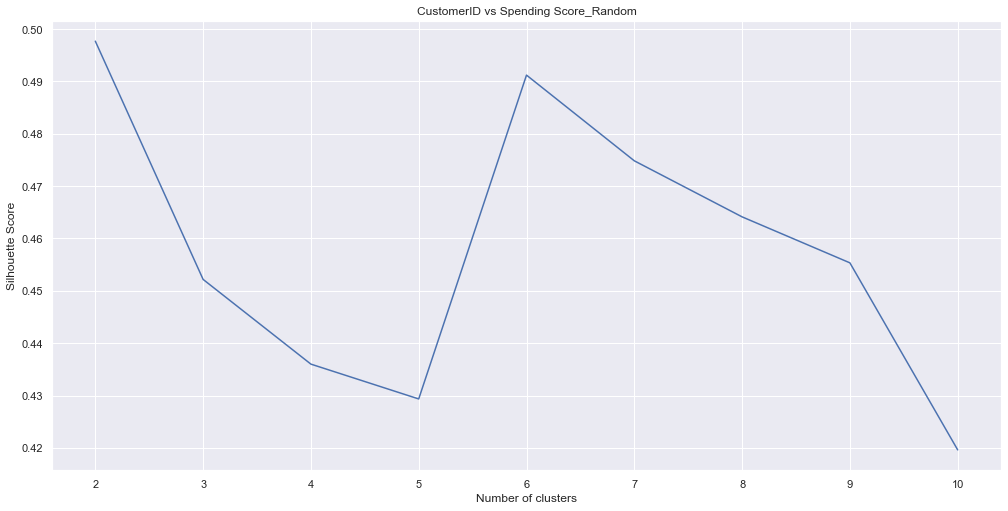

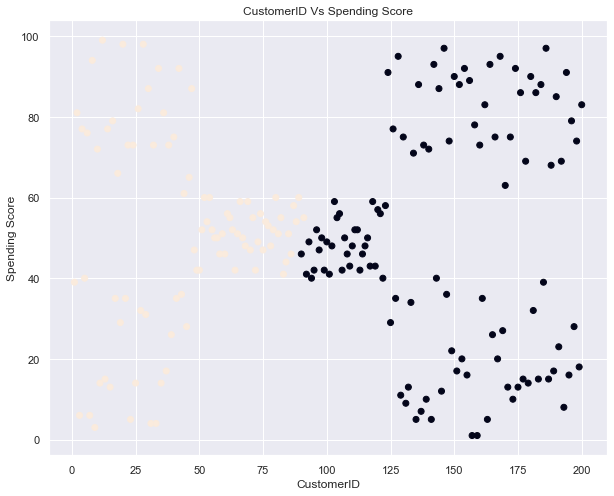

In [116]:
X = birch_input('CustomerID')
k = K_finder(X)
birch_trainer(X, k)

In [119]:
sil_list

[0.49022726193474514, 0.5609631781817316, 0.497687603683984]

In [117]:
clu = ['with Age', 'with Annual Income', 'with CustomerID']

In [120]:
score = pd.DataFrame({
    'Clustering of Spending Score': clu,
    'Silhouette Score': sil_list
})

In [121]:
score

,Clustering of Spending Score,Silhouette Score
0,with Age,0.490227
1,with Annual Income,0.560963
2,with CustomerID,0.497688
